In [93]:
import numpy as np
from scipy.optimize import approx_fprime
from IPython.display import display, Image
from scipy.optimize import minimize

### Задание 1: 
Посчитайте частные производные функций в точках
(как обычно, необходимо решение на бумажке или в LaTeX и на numpy):

1) $f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

2) $f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y$

**Первая функция**

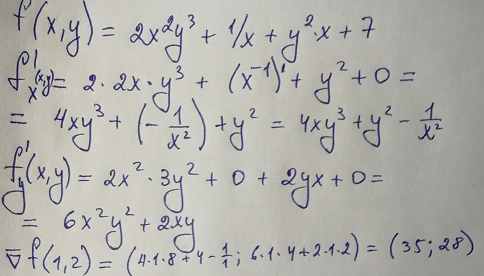

In [25]:
Image('Первая.png')

Проверка

In [26]:
from sympy import diff, symbols
x, y = symbols('x y')
diff(2 * x**2 * y**3 + 1/x + y**2 * x + 7, x)

4*x*y**3 + y**2 - 1/x**2

In [29]:
from sympy import diff, symbols
x, y = symbols('x y')
diff(2 * x**2 * y**3 + 1/x + y**2 * x + 7, y)

6*x**2*y**2 + 2*x*y

Поразбирался с np.gradient. Это тоже хороший инструмент оказался. Просто следует шаг задавать. При расчете  
градиента (производной) на границе, берется разница двух крайних точек и делится на расстояние между ними.  
При расчете в точке не на границе, береться разница двух точек соседок и соответственно деление производится на расстояние между ними,  
т.е. удвоенный интервал. Метод работает, как я понял, для функций нескольких переменных. Метод довольно точный и при расчете производной в точке, не затратный.   
Нам не нужен массив на тысячу точек, достаточно взять ближайшее окружение.  
Я реализовал домашку на данном методе нижеследующим способом.

In [8]:
def function(x,y):
    return 2 * x**2 * y**3 + 1/x + y**2 * x + 7    

In [11]:
x = np.linspace(0.99999, 1.00001, 3)
y = np.linspace(1.99999, 2.00001, 3)
f = [[function(x[i],y[j]) for i in range(len(x))] for j in range(len(y))]

In [22]:
f_x, f_y = np.gradient(f,0.00001)
print(f_x[1,1],f_y[1,1])
print(round(f_x[1,1]),round(f_y[1,1])) 

28.0000000005387 34.999999999740794
28.0 35.0


Вот как выглядит весь np.gradient. 18 производных в 9 точках.

In [18]:
np.gradient(f,0.00001)

[array([[27.99935001, 27.99987   , 28.00039   ],
        [27.99948   , 28.        , 28.00052   ],
        [27.99961   , 28.00013   , 28.00065001]]),
 array([[34.99931, 34.99948, 34.99965],
        [34.99983, 35.     , 35.00017],
        [35.00035, 35.00052, 35.00069]])]

Теперь approx_fprime

In [21]:
def func(x):
    return 2 * x[0]**2 * x[1]**3 + 1/x[0] + x[1]**2 * x[0] + 7
x = np.array([1,2])
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps])

array([35.00000024, 28.00000024])

Реализация проще, а точность пониже

**Вторая функция**

В задании не указана точка в которой следует искать, поэтому решил найти в точке (0,0).  
Для функций со смесью геометричеких функций и полиномов - это проще всего))

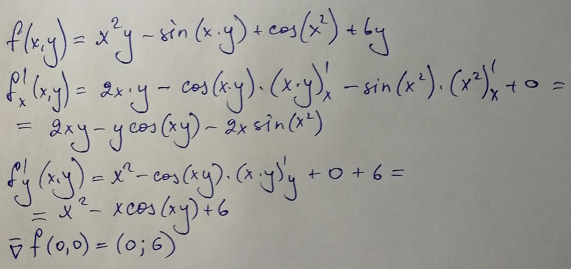

In [28]:
Image('Вторая.png')

Проверка

In [6]:
from sympy import diff, symbols, sin, cos
x, y = symbols('x y')
diff(x**2 * y - sin(x*y) + cos(x**2) + 6 * y, x)

2*x*y - 2*x*sin(x**2) - y*cos(x*y)

In [7]:
from sympy import diff, symbols, sin, cos
x, y = symbols('x y')
diff(x**2 * y - sin(x*y) + cos(x**2) + 6 * y, y)

x**2 - x*cos(x*y) + 6

In [42]:
def function(x,y):
    return x**2 * y - sin(x*y) + cos(x**2) + 6 * y

In [45]:
x = np.linspace(-0.00001, 0.00001, 3)
y = np.linspace(-0.00001, 0.00001, 3)
f = [[function(x[i],y[j]) for i in range(len(x))] for j in range(len(y))]

In [46]:
f_x, f_y = np.gradient(f,0.00001)
print(f_x[1,1],f_y[1,1])
print(round(f_x[1,1]),round(f_y[1,1])) 

5.999999999994897 0.0
6.0 0.0


In [47]:
np.gradient(f,0.00001)

[array([[6.00001, 6.     , 5.99999],
        [6.00001, 6.     , 5.99999],
        [6.00001, 6.     , 5.99999]]),
 array([[ 1.00001007e-05,  9.99999528e-06,  9.99988981e-06],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.00000896e-05, -9.99998973e-06, -9.99988981e-06]])]

In [49]:
def func(x):
    return x[0]**2 * x[1] - sin(x[0]*x[1]) + cos(x[0]**2) + 6 * x[1]
x = np.array([0,0])
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps])

array([0., 6.])

**Еще следует отметить, что следует быть аккуратным с методом np.gradient, т.к. он "путает" x и y**

### Задание 2:

Градиентный спуск своими руками

In [105]:
def func(x):
    return (x[0]**2) + (x[1]**2) 

In [81]:
eps = np.sqrt(np.finfo(float).eps)

In [106]:
x = np.array([100, 200])
lr = 0.1

In [107]:
f = func(x)

In [108]:
i = 1
j = 0
while i < 10:
    # Calculate gradient
    grad =approx_fprime(x, func, [eps, eps])
    # Update x with gradient
    x = x - grad * lr
    if func(x) < f:
        f = np.array([func(x)])
        j += 1
        print(j,x,f,grad)
    else:
        break

1 [ 80. 160.] [32000.] [200. 400.]
2 [ 64. 128.] [20480.] [160. 320.]
3 [ 51.2 102.4] [13107.2] [128. 256.]
4 [40.95999756 81.92000732] [8388.609] [102.40002441 204.79992676]
5 [32.76799316 65.53599854] [5368.70848] [ 81.92004395 163.84008789]
6 [26.21439819 52.42879639] [3435.9733632] [ 65.53594971 131.07202148]
7 [20.97151794 41.94303894] [2199.02308045] [ 52.42880249 104.85757446]
8 [16.77721558 33.55443115] [1407.37481245] [41.94302368 83.88607788]
9 [13.42177277 26.84354553] [900.71992093] [33.5544281 67.1088562]
10 [10.73741837 21.47483673] [576.46076578] [26.84354401 53.68708801]
11 [ 8.5899353  17.17986984] [368.93491631] [21.47483063 42.94966888]
12 [ 6.87194824 13.74389572] [236.11834224] [17.17987061 34.35974121]
13 [ 5.49755859 10.99511662] [151.11573988] [13.74389648 27.48779106]
14 [4.39804688 8.79609337] [96.71407486] [10.99511719 21.99023247]
15 [3.51843748 7.03687468] [61.89700751] [ 8.79609394 17.59218693]
16 [2.81475    5.62949977] [39.61408524] [ 7.03687477 14.07374

In [91]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", func(x))

Минимум достигается в:  [-4.03300102e-09 -6.15421878e-10]
Значение функции в минимуме:  1.664384130055696e-17


Проверка с помощью встроенной функции numpy: 

In [94]:
res = minimize(func, [100,200], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 72
         Function evaluations: 138


In [95]:
res.x

array([2.95771327e-07, 6.94893813e-08])

# Спасибо, было интересно